<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_score = '/Users/yesplum/Desktop/materials/projects/project-2/sat_scores.csv'

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
with open(sat_score, 'r') as f:
    sat_read = f.readlines()

In [4]:
sat_data = [sat_read[i].replace('\n','').split(sep = ',')for i in range (len(sat_read))] #clean the data
sat_header = sat_data[0]
sat_value = sat_data[1:]

In [5]:
sat_valueT = [list(i)for i in zip(*sat_value)] #transpose sat_value
sat_dict = dict(zip(sat_header, sat_valueT)) 

In [6]:
sat_use_dict = pd.DataFrame(sat_dict) #columns in the dataframe which converted from dictionary are all object
sat_use_dict.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [7]:
sat = pd.read_csv(sat_score) 
sat.head()
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [8]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
sat.head(10)
sat.columns[1:]

Index(['Rate', 'Verbal', 'Math'], dtype='object')

In [10]:
sat.shape

(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

1. Title: SAT scores by state

2. Sources:
   (a) Origin:  Unknown
   (b) Creator: Unknown
   (c) Date: Year 2001

3. Number of Instances: 52

4. Number of Attributes: 4 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

5. Attribute Information:

    1. STATE     States from United State of America (String)
    2. RATE      Participation rate (percent) for the SAT test (Integer)
    3. VERBAL    SAT reading test (Integer)
    4. MATH      SAT mathematic section (Integer)


6. Missing Attribute Values:  None.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5, 1.0, 'Distribution for verbal SAT score')

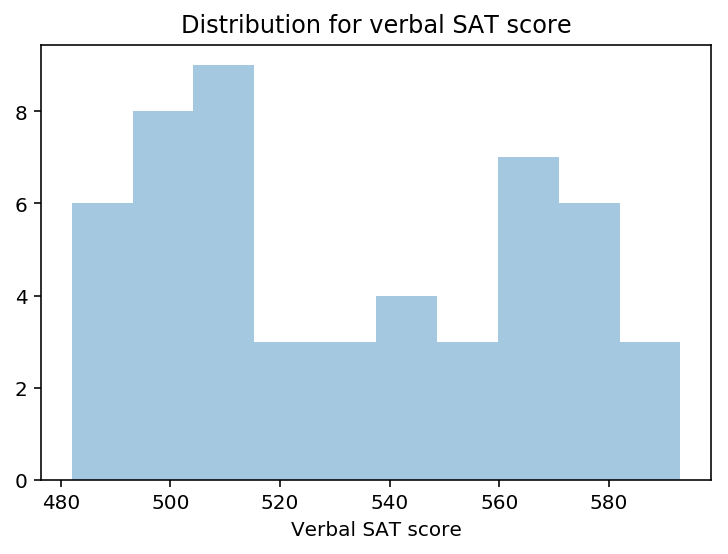

In [11]:
sns.distplot(sat['Verbal'],axlabel='Verbal SAT score', kde=False, bins=10).set_title('Distribution for verbal SAT score')

Text(0.5, 1.0, 'Distribution for Math SAT score')

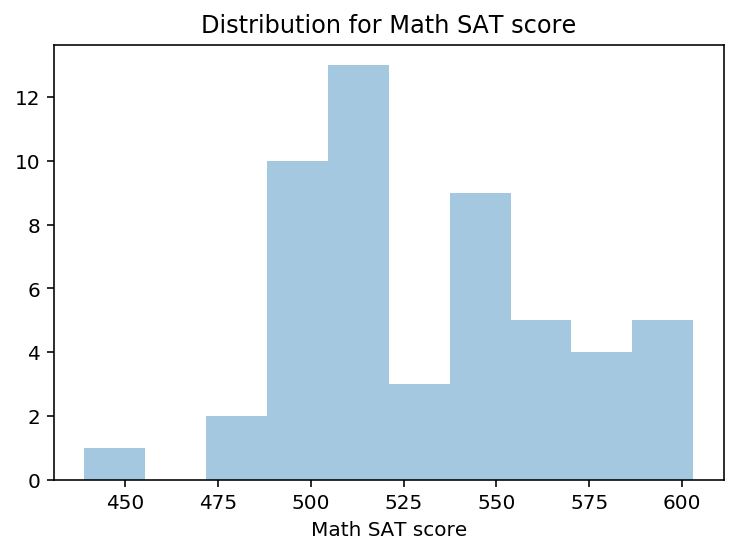

In [12]:
sns.distplot(sat['Math'],axlabel='Math SAT score', kde=False, bins=10).set_title('Distribution for Math SAT score')

Text(0.5, 1.0, 'Distribution for SAT participation rate')

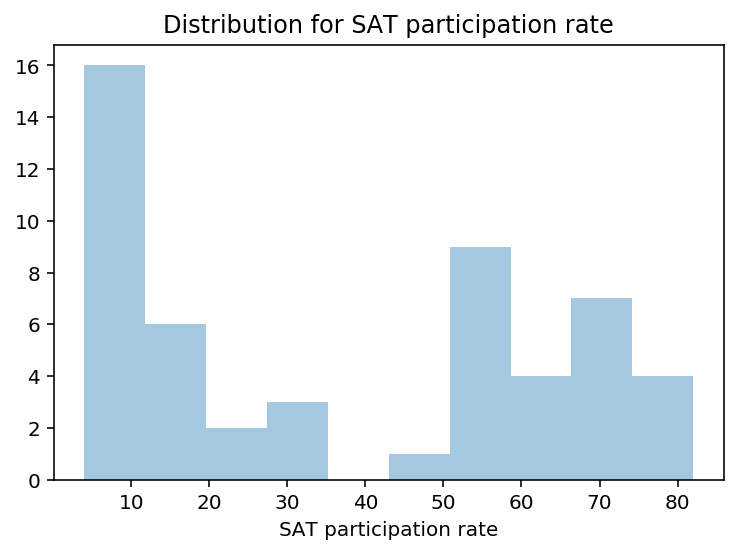

In [13]:
sns.distplot(sat['Rate'],axlabel='SAT participation rate', kde=False, bins=10).set_title('Distribution for SAT participation rate')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


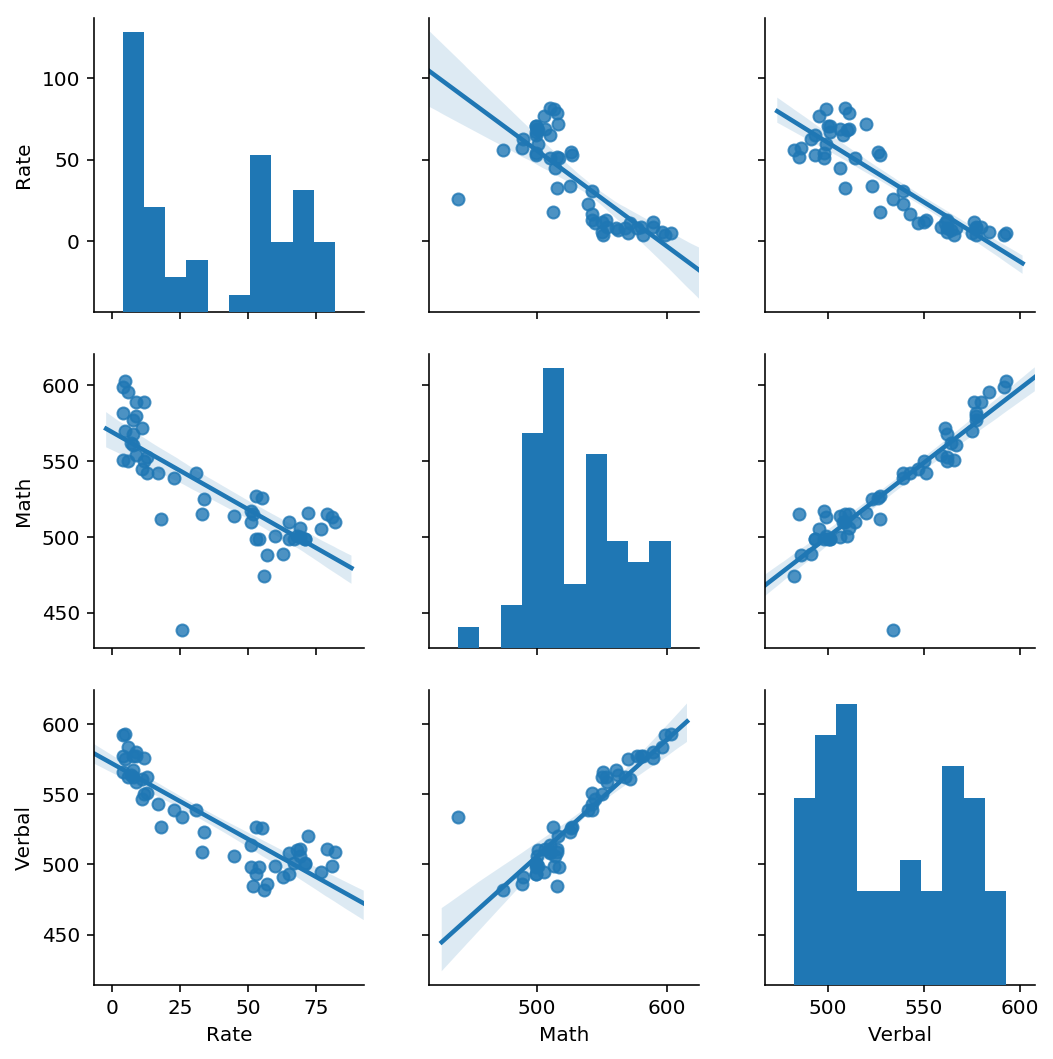

In [14]:
g = sns.pairplot(sat, vars=["Rate", "Math", "Verbal"],kind="reg")

SAT score for Math and Verbal has strong positive correration 
Participation rate has strong negative correration with Math and Verbal score

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5, 0, 'SAT score')

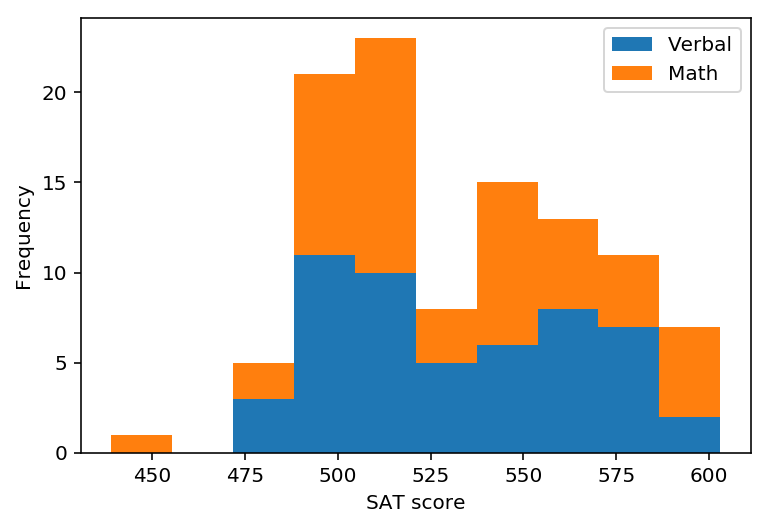

In [15]:
ax = sat.loc[:,'Verbal':'Math'].plot.hist(stacked=True, bins=10)
ax.set_xlabel('SAT score')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0, 0.5, 'SAT Score')

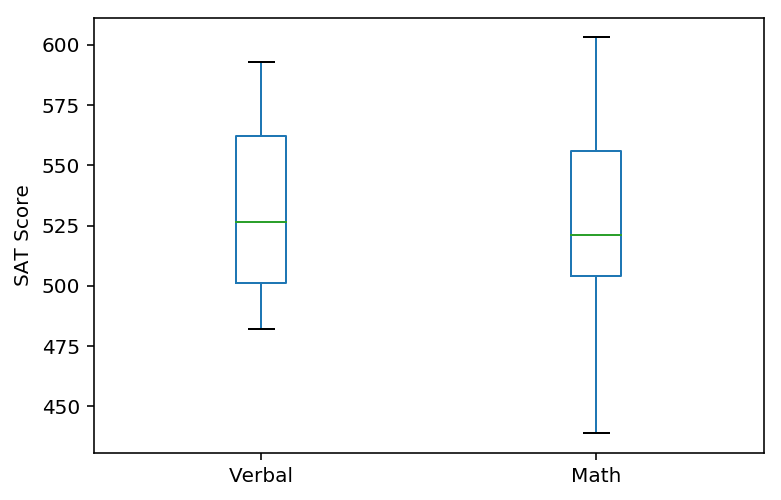

In [16]:
ax = sat.loc[:,'Verbal':'Math'].plot.box()
ax.set_ylabel('SAT Score')

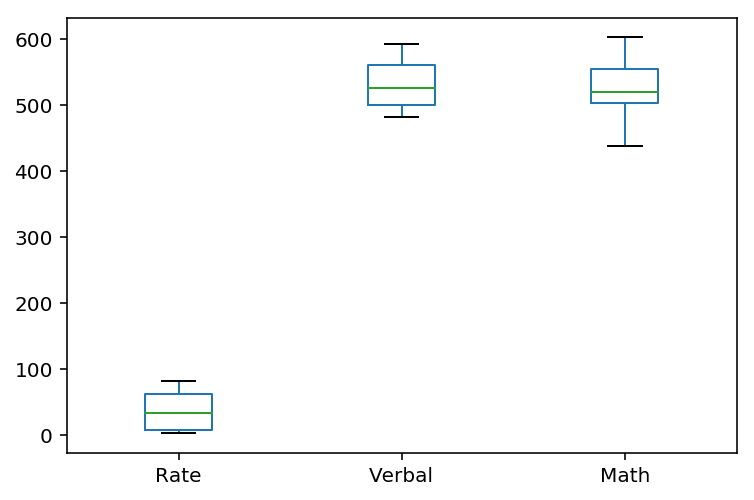

In [17]:
#ploting Rate with Verbal and Math will have bad visualization due to Rate has different set of value and range
ax = sat.plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


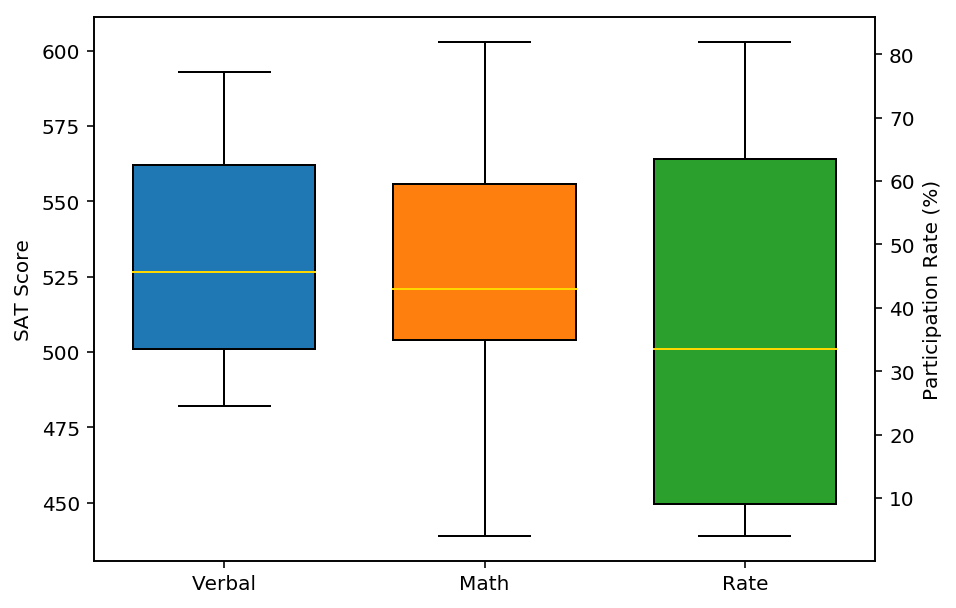

In [18]:
#First approach to use secondary axis for 'Rate'

fig, ax1  = plt.subplots(figsize=(7, 5))

props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="gold"))
box1=ax1.boxplot(sat[['Verbal', 'Math']].values, positions=[0,1], **props)


ax2 = ax1.twinx()
box2=ax2.boxplot(sat['Rate'].values,positions=[2], **props)

ax1.set_xlim(-0.5,2.5)
ax1.set_xticks(range(len(sat.columns[1:])))
ax1.set_xticklabels(['Verbal', 'Math', 'Rate'])
ax1.set_ylabel('SAT Score')
ax2.set_ylabel('Participation Rate (%)')

for b in box1["boxes"]+box2["boxes"]:
    b.set_facecolor(next(ax1._get_lines.prop_cycler)["color"])
plt.show()

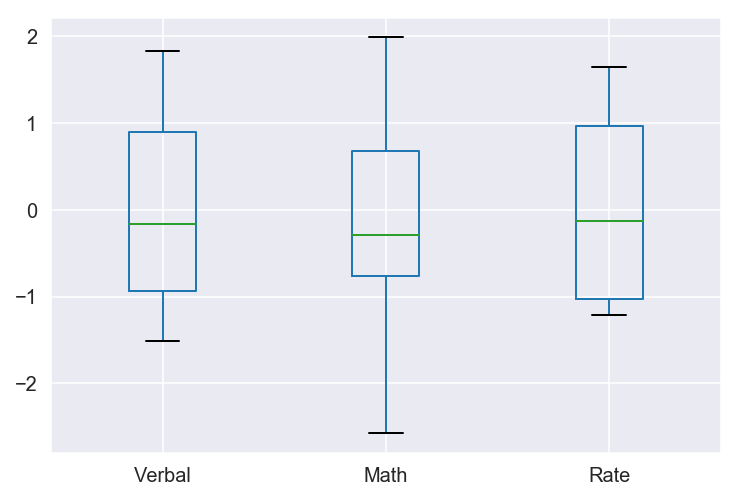

In [492]:
#second approach to standardize the values for all 3 groups

new_sat = sat.copy()
new_sat['Rate'] = (new_sat['Rate'] - new_sat['Rate'].mean()) / new_sat['Rate'].std()
new_sat['Verbal'] = (new_sat['Verbal'] - new_sat['Verbal'].mean()) / new_sat['Verbal'].std()
new_sat['Math'] = (new_sat['Math'] - new_sat['Math'].mean()) / new_sat['Math'].std()
new_sat[['Verbal','Math','Rate']].plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [19]:
sat['Verbal'].mean()

532.0192307692307

In [20]:
np.median(sat['Verbal'])

526.5

In [21]:
mask = sat['Verbal'] > sat['Verbal'].mean()
st_above_mean = sat[mask]
print('Total states with verbal sat scores above mean:',len(st_above_mean))
print(st_above_mean)

Total states with verbal sat scores above mean: 24
   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
mask = sat['Verbal'] > np.median(sat['Verbal'])
st_above_med = sat[mask]
print('Total states with verbal sat scores above median:',len(st_above_med))
print(st_above_med)

Total states with verbal sat scores above median: 26
   State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [23]:
sat_new = sat.copy()
sat_new['diff_verbal_math'] = sat_new['Verbal'] - sat_new['Math']
sat_new.head()

,State,Rate,Verbal,Math,diff_verbal_math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [24]:
df1 = sat_new[sat_new['diff_verbal_math']>0].copy()
df1 = df1.sort_values(by=['diff_verbal_math'],ascending=False)
df1.reset_index(drop=True, inplace=True)
df1.index = df1.index + 1
df1 = df1.head(10)
df1.head(3)

,State,Rate,Verbal,Math,diff_verbal_math
1,OH,26,534,439,95
2,WV,18,527,512,15
3,MS,4,566,551,15


In [25]:
df2 = sat_new[sat_new['diff_verbal_math']<0].copy()
df2 = df2.sort_values(by=['diff_verbal_math'],ascending=True)
df2.reset_index(drop=True, inplace=True)
df2.index = df2.index + 1
df2 = df2.head(10)
df2.head(3)

,State,Rate,Verbal,Math,diff_verbal_math
1,HI,52,485,515,-30
2,CA,51,498,517,-19
3,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [26]:
sat_corr = sat.corr()
sat_corr #SAT correlation matrix

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


Student with higher Math score will have higher verbal score or vice versa.
When student participation rate increased, math and verbal SAT score will decrease

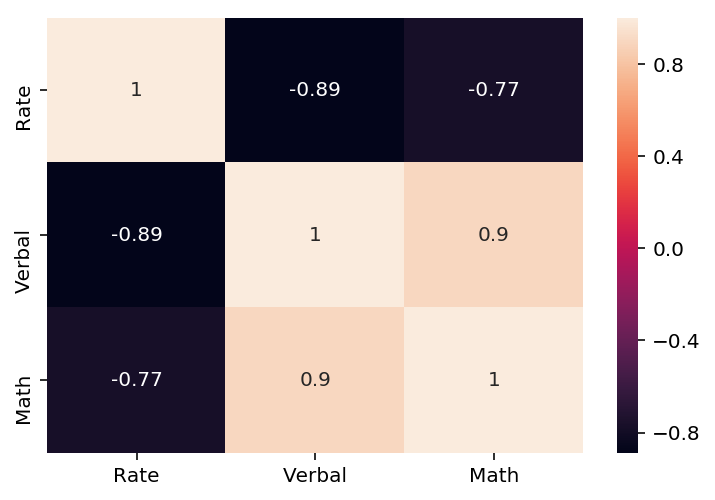

In [27]:
sns.heatmap(sat.corr(), annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [28]:
sat.iloc[0:51].describe() #excluding 'All' (US national score)

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


count =  count number of non-null observations.
mean = average of the column
std = standard deviation of the column
min = minimun value of the column
25% = lower percentile of the column or 25th percentile
50% = median of the column or 50th percentile
75% = upper percentile of the column or 75th percentile
max = maximum value of the column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [29]:
sat_cov = sat.iloc[0:51].cov() #excluding 'All' from the calculation
sat_cov #SAT covariance matrix

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


In [30]:
def convert_corr(cov_mat, return_std=False): #function to convert covariance matrix into correlation matrix
    cov = np.asanyarray(cov_mat) #convert dataframe to ndarray
    std_ = np.sqrt(np.diag(cov)) #extract diagonal data from 'cov' ndarray and square-root it
    corr = pd.DataFrame(cov / np.outer(std_, std_))
    corr.columns = cov_mat.columns
    corr.index = cov_mat.index
    if return_std:
        return corr, std_
    else:
        return corr

In [31]:
sat_corr_cov = convert_corr(sat_cov)
sat_corr_cov #SAT correlation matrix converted from covariance matrix

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [105]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [386]:
drug_use_path = 'drug-use-by-age.csv'
drug_use = pd.read_csv(drug_use_path)

In [387]:
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [388]:
drug_use = pd.read_csv(drug_use_path).replace('-',0) #replace '-' from drug frequency columns to 0 due to drug use = 0
drug_use.columns = drug_use.columns.str.replace('-','_')
drug_use.set_index('age', inplace=True) #push 'age' columns become index
drug_use = drug_use.drop(columns='n') #remove sample size count for each group
cols = drug_use.columns
drug_use[cols] = drug_use[cols].apply(pd.to_numeric, errors='coerce', axis=1) #convert all object group to float

In [389]:
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 12 to 65+
Data columns (total 26 columns):
alcohol_use                17 non-null float64
alcohol_frequency          17 non-null float64
marijuana_use              17 non-null float64
marijuana_frequency        17 non-null float64
cocaine_use                17 non-null float64
cocaine_frequency          17 non-null float64
crack_use                  17 non-null float64
crack_frequency            17 non-null float64
heroin_use                 17 non-null float64
heroin_frequency           17 non-null float64
hallucinogen_use           17 non-null float64
hallucinogen_frequency     17 non-null float64
inhalant_use               17 non-null float64
inhalant_frequency         17 non-null float64
pain_releiver_use          17 non-null float64
pain_releiver_frequency    17 non-null float64
oxycontin_use              17 non-null float64
oxycontin_frequency        17 non-null float64
tranquilizer_use           17 non-null float64
tranqui

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [394]:
drug_use.shape

(17, 26)

In [409]:
drug_use.describe()

,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,heroin_use,heroin_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,68.970588,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,70.153285,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,35.500000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,50.000000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,66.500000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,280.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


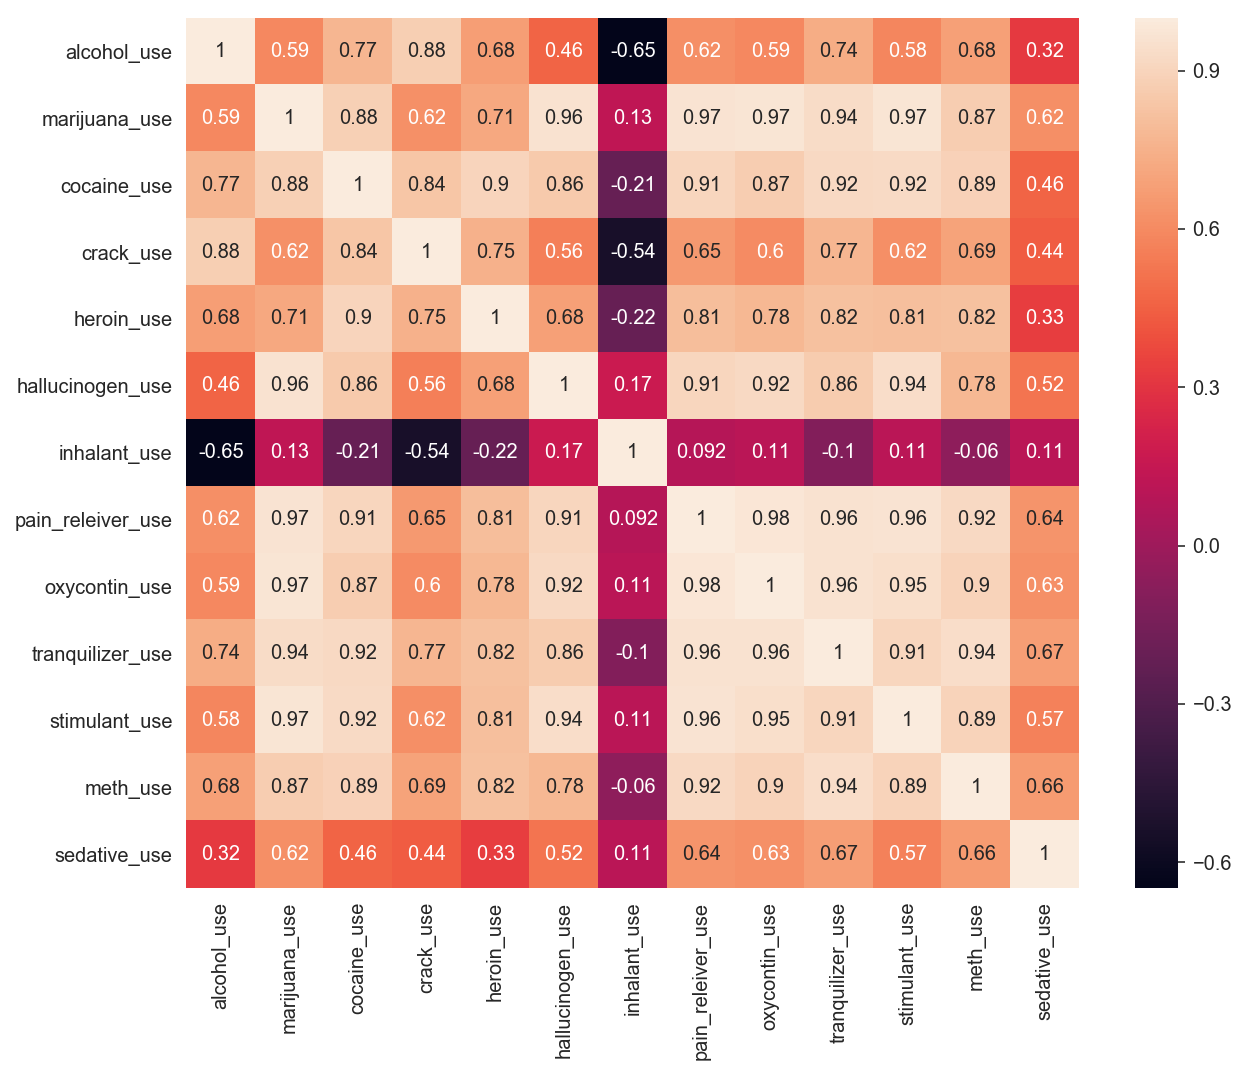

In [397]:
drug_use_age = drug_use.drop([x for x in drug_use if x.endswith('frequency')], 1) #check correlation for under drug_use
plt.figure(figsize=(10,8))
sns.heatmap(drug_use_age_avg.corr(), annot=True)

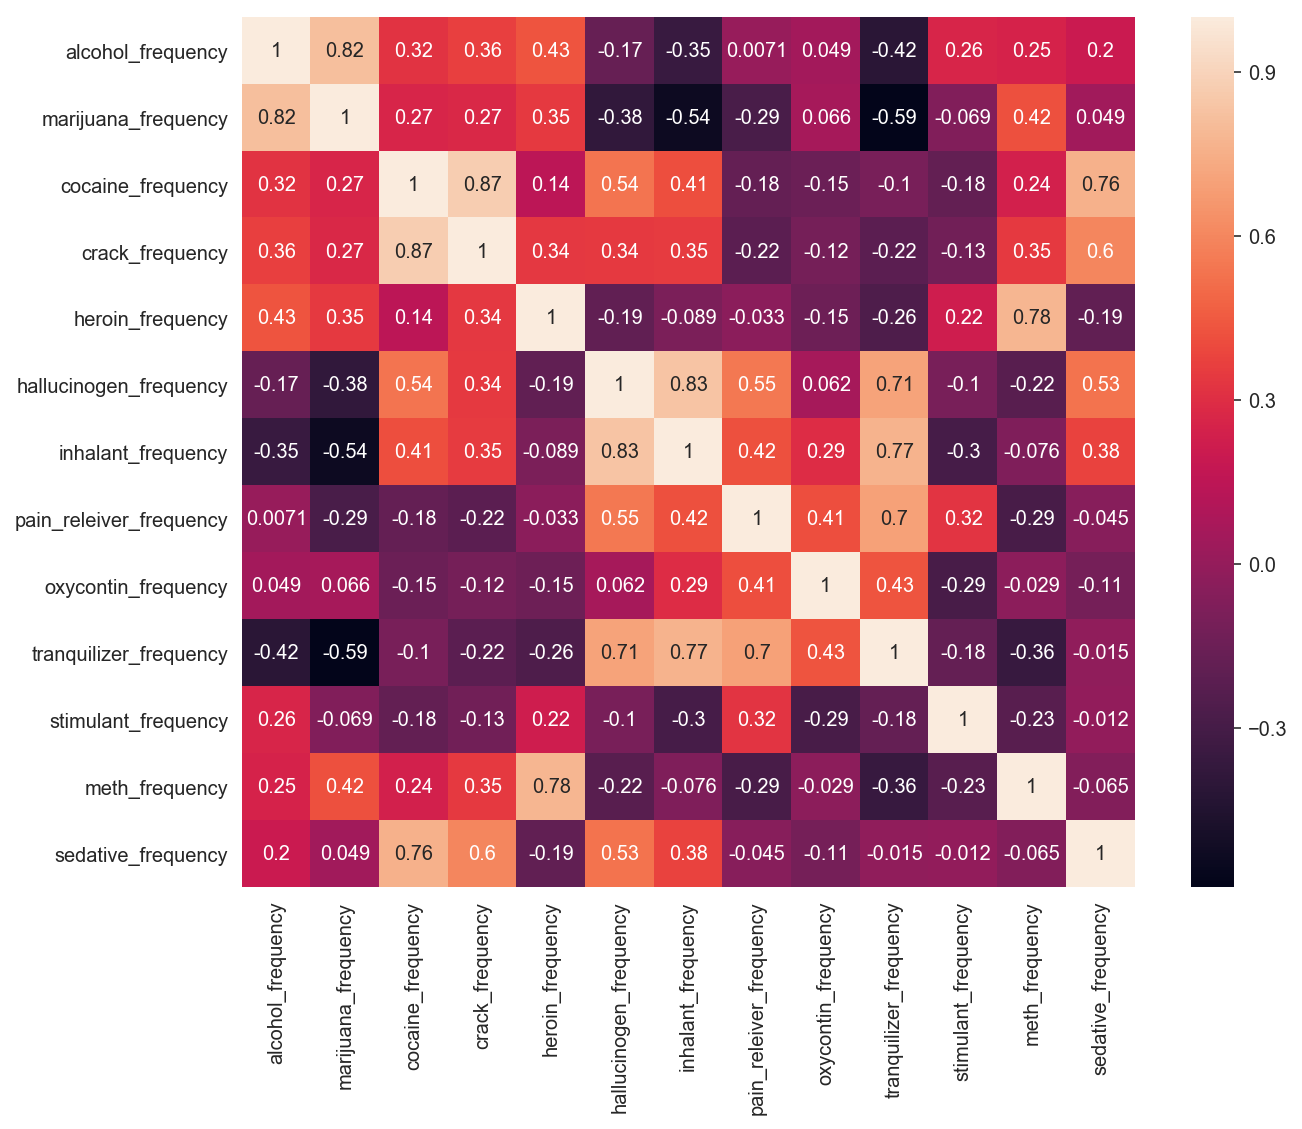

In [398]:
drug_use_freq = drug_use.drop([x for x in drug_use if x.endswith('use')], 1) 
plt.figure(figsize=(10,8))
sns.heatmap(drug_use_freq.corr(), annot=True)

1) Based on the statistic, alcohol is the top abused drug according to percentage of user per age group
2) Drug frequency has no correlation among each other
3) Inhalant use has weak correlation with other drugs use
4) Sedative use has weak correlation with other drugs use
5) Alcohol use has weak correlation with other drugs use except crack, cocaine and tranquilizer 
6) crack use has weak correlation with other drugs use except alcohol, cocaine, heroin and tranquilizer
7) The rest of the drugs use have strong correlation with each other

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

### Hypothesis 1.0
Alcohol is the top abused drug

In [402]:
drug_avg = drug_use_age.mean()
df_avg = pd.DataFrame(drug_avg)
df_avg = df_avg.reset_index()

In [403]:
df_avg.rename(columns = {'index':'Drug use',0:'Avg Percent'}, inplace=True)
df_avg = df_avg.sort_values(['Avg Percent'],ascending=False)

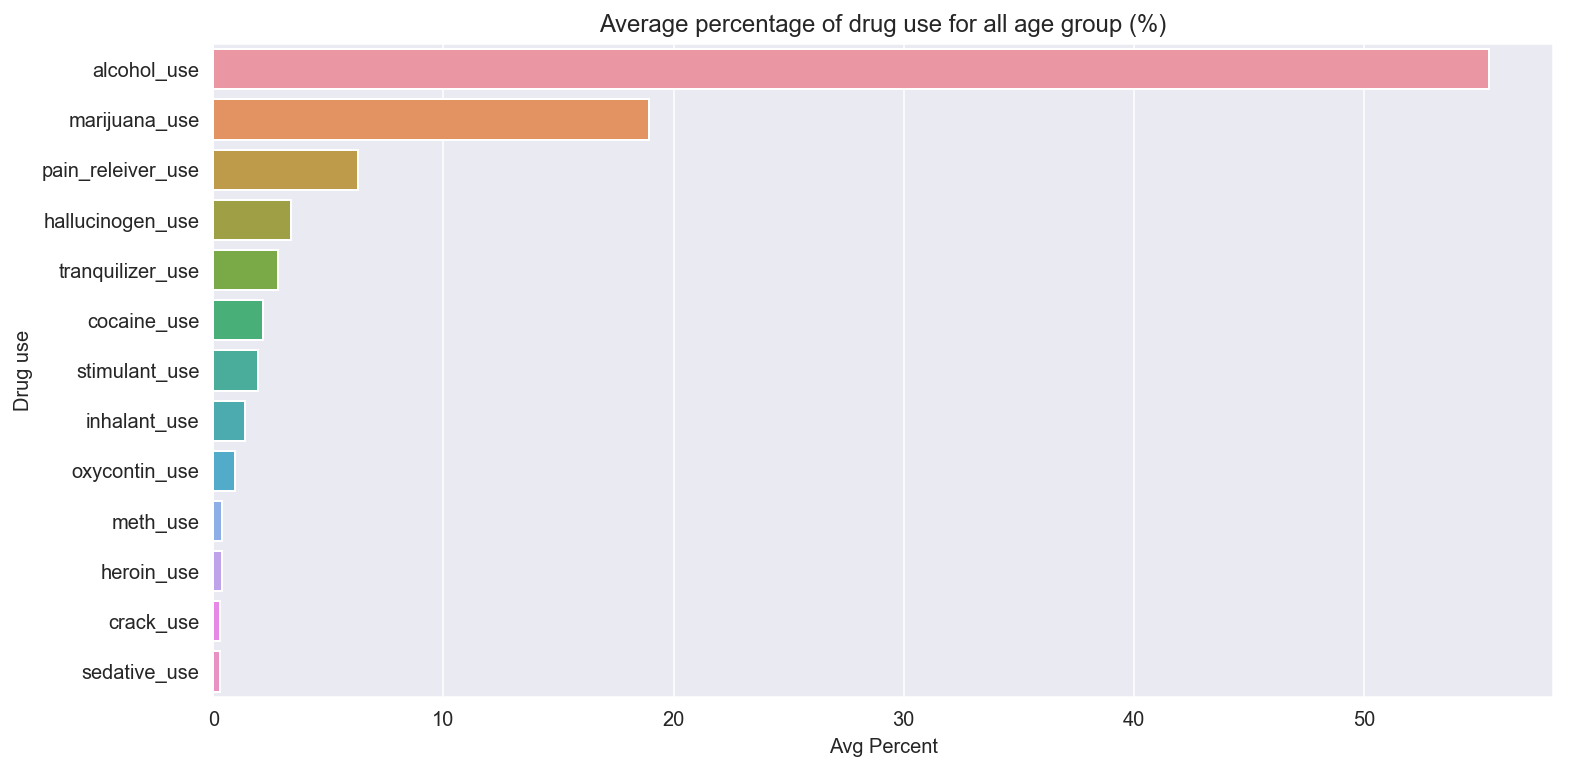

In [404]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
plt.title("Average percentage of drug use for all age group (%)")
sns.barplot(y='Drug use', x ='Avg Percent', data=df_avg, orient='h')

Barplot above shows that alcohol has the highest average percentage of drug use among all age group due to inexpensive and widely available,followed by marijuana and pain releiver

### Hypothesis 2.0
Alcohol and marijuana user age groups are correlated

In [426]:
from sklearn.preprocessing import StandardScaler #normalize value for the drug use percentage
drug_use_norm = drug_use_age.copy()
cols_to_norm = drug_use_norm.columns
drug_use_norm[cols_to_norm] = StandardScaler().fit_transform(drug_use_norm[cols_to_norm])

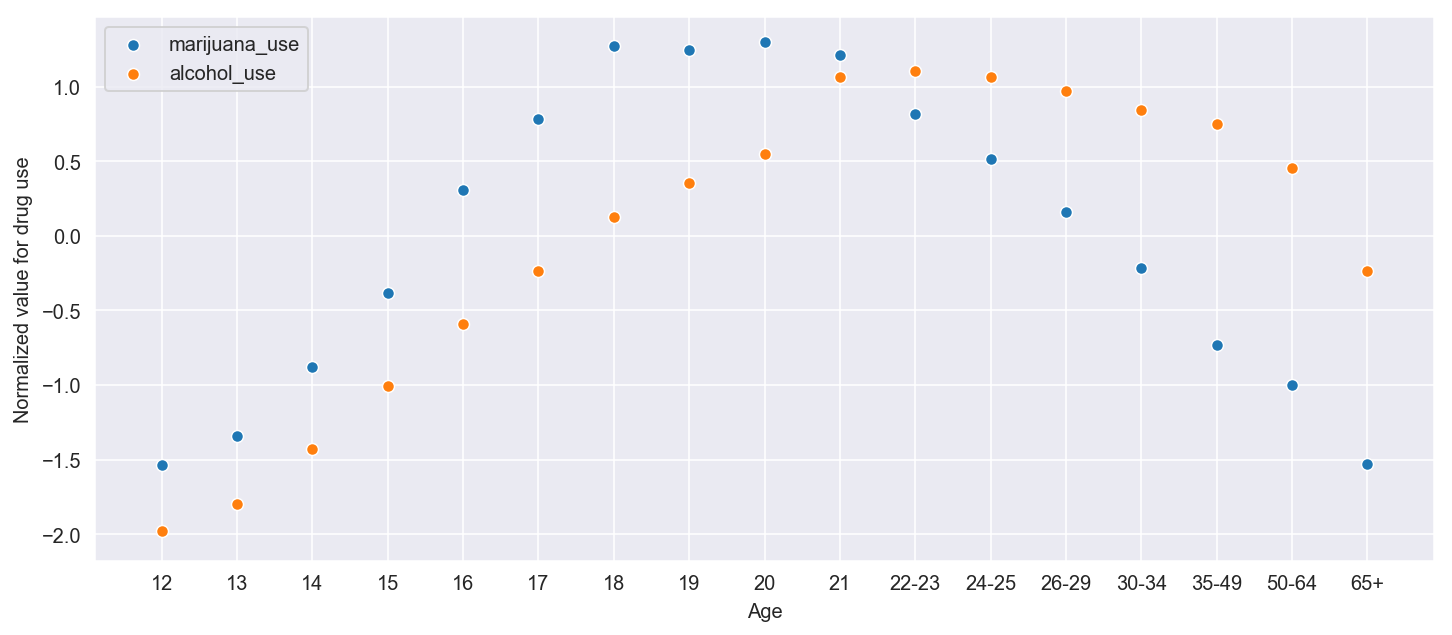

In [433]:
drugs = ['marijuana_use', 'alcohol_use']
plt.figure(figsize=(12,5))
plt.xlabel("Age")
plt.ylabel("Normalized value for alcohol and marijuana use")
sns.set_style("darkgrid")
for col in drugs:
    sns.scatterplot(data=drug_use_norm[col])
    
plt.legend(drugs,loc=2)

In [439]:
drug_use_age.iloc[:,0:2].corr()

,alcohol_use,marijuana_use
alcohol_use,1.000000,0.594165
marijuana_use,0.594165,1.000000


Data shows that alcohol and marijuana do not have strong correlation, due to marijuana user age group peak at age 18 and start to decrease at age 21 whereby alcohol user peak at age 21.

### Hypothesis 3.0
Alcohol and marijuana user peak age is the same
H0 : The mean age group of usage difference between alcohol and marijuana is zero.
H1 : The mean age group of usage difference between alcohol and marijuana is not zero.

In [442]:
#conducting T-Test
ttest, p = stats.ttest_ind(drug_use_age[['alcohol_use']], drug_use_age[['marijuana_use']])
print(ttest, p)

[5.11624681] [1.41715671e-05]


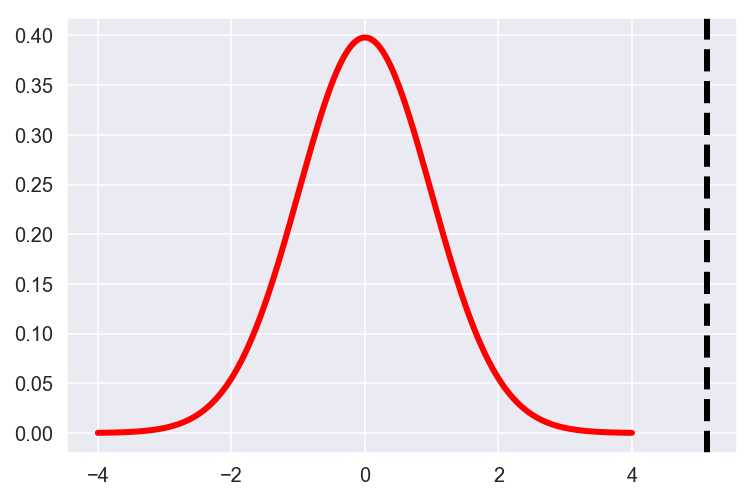

In [453]:
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, (50+50-2), 0, 1)
sns.lineplot(x, y, linewidth=3, color='r')
plt.axvline(t_test, color='k', linestyle='--', lw=3)

The null hypothesis is rejected by the result of the t-test.
This indicates that the peak age of use alcohol and marijuana is different. 
The reason could be that the peak age of alcohol is 21 years old. This age is the legal age of drinking alcohol in the United state whereby cannabis legal age for certain states is 18 years old

### Hypothesis 4.0
The peak age of most drugs is 21 years old

In [56]:
drugs = ['marijuana_use', 'cocaine_use','heroin_use',
         'hallucinogen_use', 'pain_releiver_use','oxycontin_use',
         'tranquilizer_use', 'stimulant_use', 'meth_use',
        ]
#filtered out drugs which have weak correlation with other drugs (Inhalant, Sedative, Alcohol and Crack)

In [57]:
from sklearn.preprocessing import StandardScaler #normalize value for the drug use percentage
drug_use_norm = drug_use_age.copy()
cols_to_norm = drug_use_norm.columns
drug_use_norm[cols_to_norm] = StandardScaler().fit_transform(drug_use_norm[cols_to_norm])

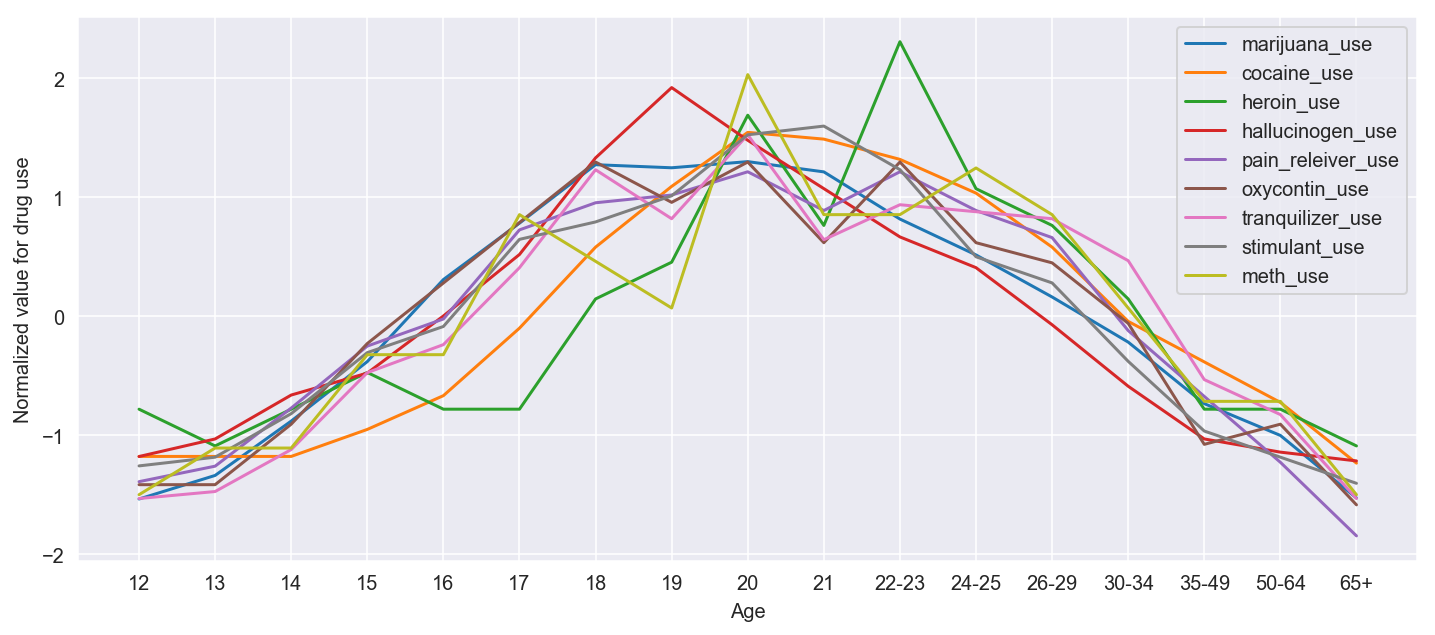

In [361]:
plt.figure(figsize=(12,5))
plt.xlabel("Age")
plt.ylabel("Normalized value for drug use")
sns.set_style("darkgrid")
for col in drugs:
    sns.lineplot(data=drug_use_norm[col])
    
plt.legend(drugs,loc=0)

Chart above shows that percentage of drug user (except Inhalant, Sedative, Alcohol and Crack) topped at age 20 to 21 due to this is the legal age for most countries

**Report**
### Hypothesis 1.0
Alcohol is the top abused drug 
(Finding) Alcohol has the highest average percentage of drug use among all age group,followed by marijuana and pain releiver due to inexpensive and widely available


### Hypothesis 2.0
Alcohol and marijuana user age groups are correlated
(Finding) Data shows that alcohol and marijuana do not have strong correlation, due to marijuana user age group peak at age 18 and start to decrease at age 21 whereby alcohol user peak at age 21.


### Hypothesis 3.0
Alcohol and marijuana user peak age is the same
H0 : The mean age group of usage difference between alcohol and marijuana is zero.
H1 : The mean age group of usage difference between alcohol and marijuana is not zero.

(Finding) The null hypothesis is rejected by the result of the t-test.
This indicates that the peak age of use alcohol and marijuana is different. 
The reason could be that the peak age of alcohol is 21 years old. This age is the legal age of drinking alcohol in the United state whereby cannabis legal age for certain states is 18 years old

### Hypothesis 4.0
The peak age of most drugs is 21 years old
(Finding) Chart above shows that percentage of drug user (except Inhalant, Sedative, Alcohol and Crack) topped at age 20 to 21  due to this is the legal age for most countries

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

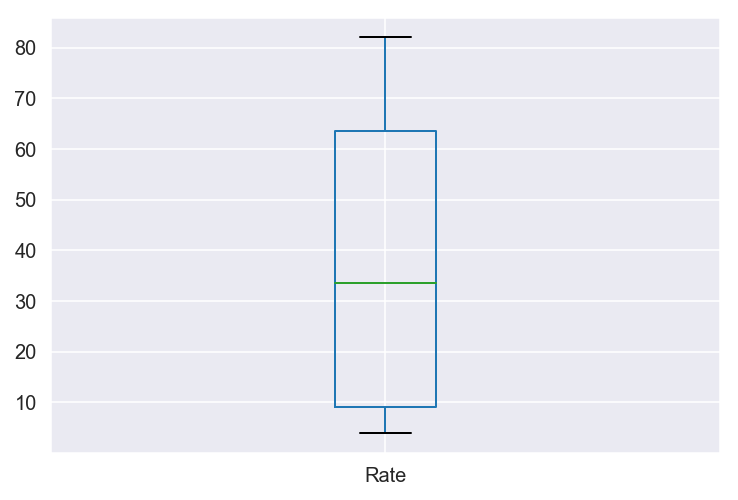

In [457]:
ax = sat['Rate'].plot.box()

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population

The outlier is numerically defined as
Lower outlier = Q1-k(Q3-Q1)
Upper outlier = Q3+k(Q3-Q1)
Q1, Q2, Q3, are 1st quartile, median (2nd quartile), and 3rd quartile, respectively.
k = 1.5.

In [461]:
Quant = sat.quantile([0.25,0.5,0.75])
Quant

,Rate,Verbal,Math
0.25,9.0,501.0,504.00
0.50,33.5,526.5,521.00
0.75,63.5,562.0,555.75


In [459]:
Q1_rate = Quant['Rate'][0.25]
Q3_rate = Quant['Rate'][0.75]
k=1.5
IQR_rate = Q3_rate-Q1_rate
Lower_out_rate = Q1_rate-k*(Q3_rate-Q1_rate)
Upper_out_rate = Q3_rate+k*(Q3_rate-Q1_rate)

print('Lower Outlier = ', Lower_out_rate, 'Upper Outlier = ', Upper_out_rate)

Lower Outlier =  -72.75 Upper Outlier =  145.25


Based on the quantile there is no outlier from 'Rate'

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [470]:
spearman, p = stats.spearmanr(sat[['Verbal','Math']])
pearson,p = stats.pearsonr(sat['Verbal'], sat['Math'])
print('pearson =', pearson)
print('spearman =', spearman)

pearson = 0.899870852544429
spearman = 0.9052048847940284


Spearman’s Correlation is essentially a ranked version of Pearson’s

The difference between Pearson's and Spearman's correlation is that the Pearson is most appropriate for measurements taken from an interval scale (temperature, dates, lengths, etc), while the Spearman is best for measurements taken from ordinal scales (rank orders, spectrum of values (agree, neutral, disagree), or healthy vs non-healthy).

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [488]:
sat_per = sat.copy()
sat_per['Percentile'] = sat_per['Rate'].apply(lambda x: np.percentile(sat_per['Rate'], x))
sat_per['Rate_Percentile'] = [stats.percentileofscore(sat_per['Rate'], x) for x in sat_per['Rate']]
sat_per[sat_per['State'] == 'CA']

,State,Rate,Verbal,Math,Percentile,Rate_Percentile
23,CA,51,498,517,34.11,56.730769


In [490]:
spearman, p = stats.spearmanr(sat_per[['Rate','Rate']])
spearman

0.9999999999999999

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

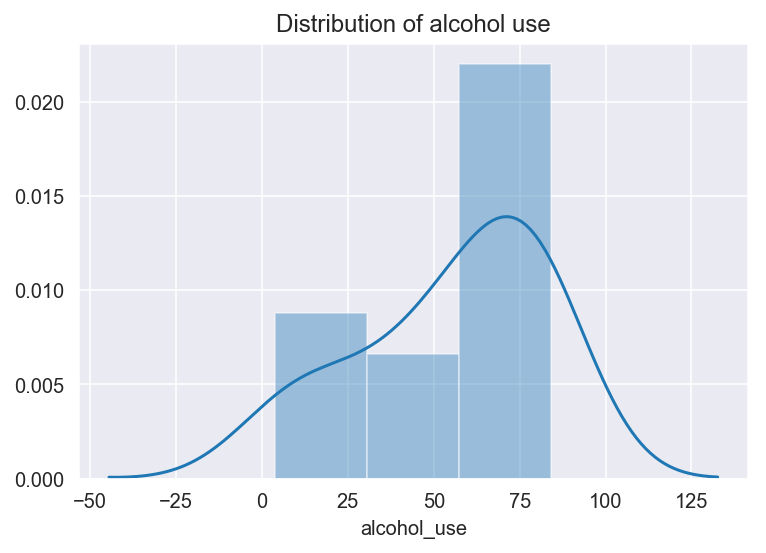

In [494]:
x = drug_use_age['alcohol_use']
ax = sns.distplot(x);
ax.set_title('Distribution of alcohol use')
plt.show()

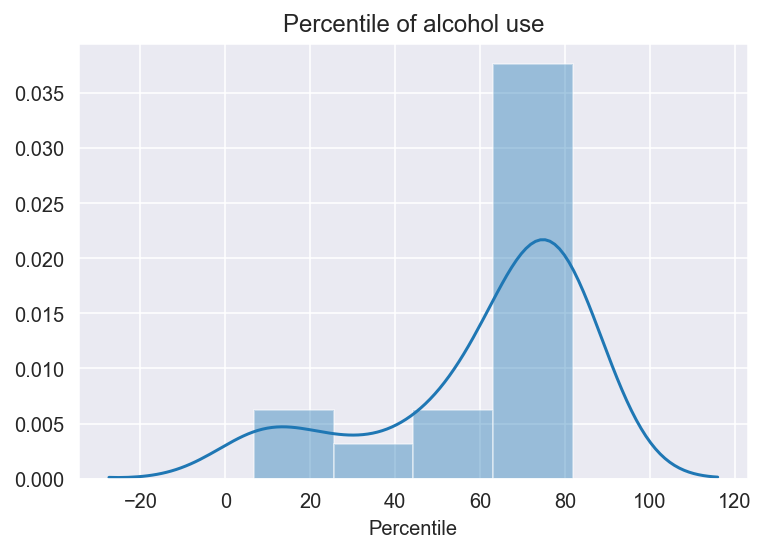

In [496]:
drug_use2 = drug_use_age.copy() # to keep original dataframe
drug_use2['Percentile'] = drug_use2['alcohol_use'].apply(lambda x: np.percentile(drug_use2['alcohol_use'], x))
ax = sns.distplot(drug_use2['Percentile'] );
ax.set_title('Percentile of alcohol use')
plt.show()